# split camera

In [47]:
import os
import pandas as pd

In [48]:
os.listdir("../../../datasets/Direct_face/batch2/clean")

['direct_face', 'spoofing_face', 'mask_on_chin_cap', 'full_body']

In [49]:
import os
root_dir = '../../../datasets/Direct_face/batch2/clean'
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
file_name_arr = []
file_path_arr = []

for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(image_extensions):
            file_path_arr.append(os.path.join(root, file))
            file_name_arr.append(file)
            # print(file, "_", root)


In [50]:
import pandas as pd
data = {
    'file_name'  : file_name_arr,
    'file_path' : file_path_arr,
}

df = pd.DataFrame(data)
df['cls'] = df.file_path.str.split('\\',expand=True)[1]
df

,file_name,file_path,cls
0,IMG_CPFGS_LG0_CPFGS00175_DriverImage_202308211...,../../../datasets/Direct_face/batch2/clean\dir...,direct_face
1,IMG_CPFGS_LG0_CPFGS01569_DriverImage_202308311...,../../../datasets/Direct_face/batch2/clean\dir...,direct_face
2,IMG_CPFGS_LG0_CPFGS01886_DriverImage_202308231...,../../../datasets/Direct_face/batch2/clean\dir...,direct_face
3,IMG_CPFGS_LG0_CPFGS003416193_DriverImage_20231...,../../../datasets/Direct_face/batch2/clean\dir...,direct_face
4,IMG_CPFGS_LG0_CPFGS01648_DriverImage_202308211...,../../../datasets/Direct_face/batch2/clean\dir...,direct_face
...,...,...,...
662,IMG_CPFGS_LG0_CPFGS000445170_DriverImage_20240...,../../../datasets/Direct_face/batch2/clean\ful...,full_body
663,IMG_CPFGS_LG0_CPFGS003340499_DriverImage_20240...,../../../datasets/Direct_face/batch2/clean\ful...,full_body
664,IMG_CPFGS_LG0_CPFGS00371_DriverImage_202308211...,../../../datasets/Direct_face/batch2/clean\ful...,full_body
665,IMG_CPFGS_LG0_CPFGS01967_DriverImage_202308231...,../../../datasets/Direct_face/batch2/clean\ful...,full_body


<Axes: >

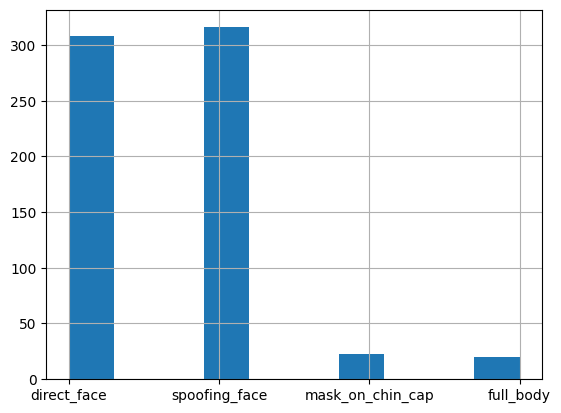

In [51]:
df.cls.hist(bins = 10)

In [58]:
from sklearn.model_selection import train_test_split
x = df[['file_name','file_path','cls']]
y = df[['cls']]

# First, split into training + validation and test sets with stratification
x_train_val, x_test, y_train_val, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# Then split the training+validation set into separate training and validation sets with stratification
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42
)

In [59]:
print(f"Training set: {len(x_train)}, Validation set: {len(x_val)}, Test set: {len(x_test)}")

Training set: 426, Validation set: 107, Test set: 134


In [60]:
y_train.cls.value_counts()

cls
spoofing_face       202
direct_face         197
mask_on_chin_cap     14
full_body            13
Name: count, dtype: int64

In [61]:
y_test.cls.value_counts()

cls
spoofing_face       63
direct_face         62
mask_on_chin_cap     5
full_body            4
Name: count, dtype: int64

In [62]:
y_val.cls.value_counts()

cls
spoofing_face       51
direct_face         49
mask_on_chin_cap     4
full_body            3
Name: count, dtype: int64

# Copy split train-test

In [63]:
x_train.head(2)

,file_name,file_path,cls
323,IMG_CPFGS_LG0_CPFGS02250_DriverImage_202308220...,../../../datasets/Direct_face/batch2/clean\spo...,spoofing_face
340,IMG_CPFGS_LG0_CPFGS00827_DriverImage_202312250...,../../../datasets/Direct_face/batch2/clean\spo...,spoofing_face


In [64]:
x_train.file_path.iloc[0]

'../../../datasets/Direct_face/batch2/clean\\spoofing_face\\IMG_CPFGS_LG0_CPFGS02250_DriverImage_20230822040947.jpeg'

In [65]:
root_source = None
root_destination = '../../../datasets/Direct_face/batch2/clean_split'

In [69]:
from tqdm import tqdm
import shutil

df_copy = x_val

for file_name, file_path, cls in tqdm(zip(df_copy.file_name.iloc[:], df_copy.file_path.iloc[:], df_copy.cls.iloc[:])):
    source = file_path
    destination = f"{root_destination}/val/{cls}/{file_name}"

    # Copy file
    shutil.copy(source, destination)

print("File copied successfully!")

107it [00:01, 102.21it/s]

File copied successfully!
